In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/aksha/Downloads/iris_dataset_group10.csv")
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Dataset Shape: (150, 5)

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Unique Encoded Classes: ['setosa' 'versicolor' 'virginica']


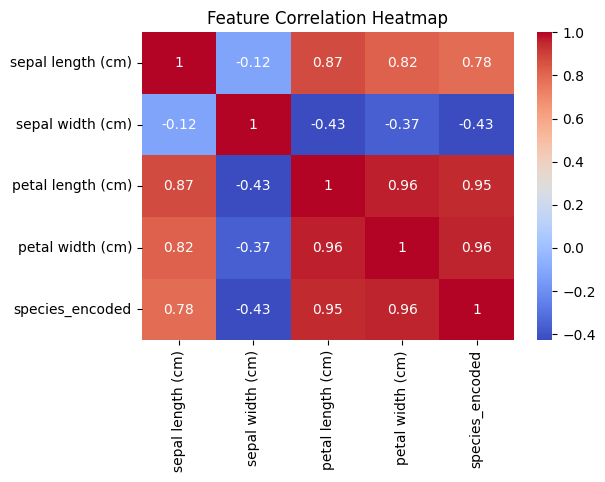

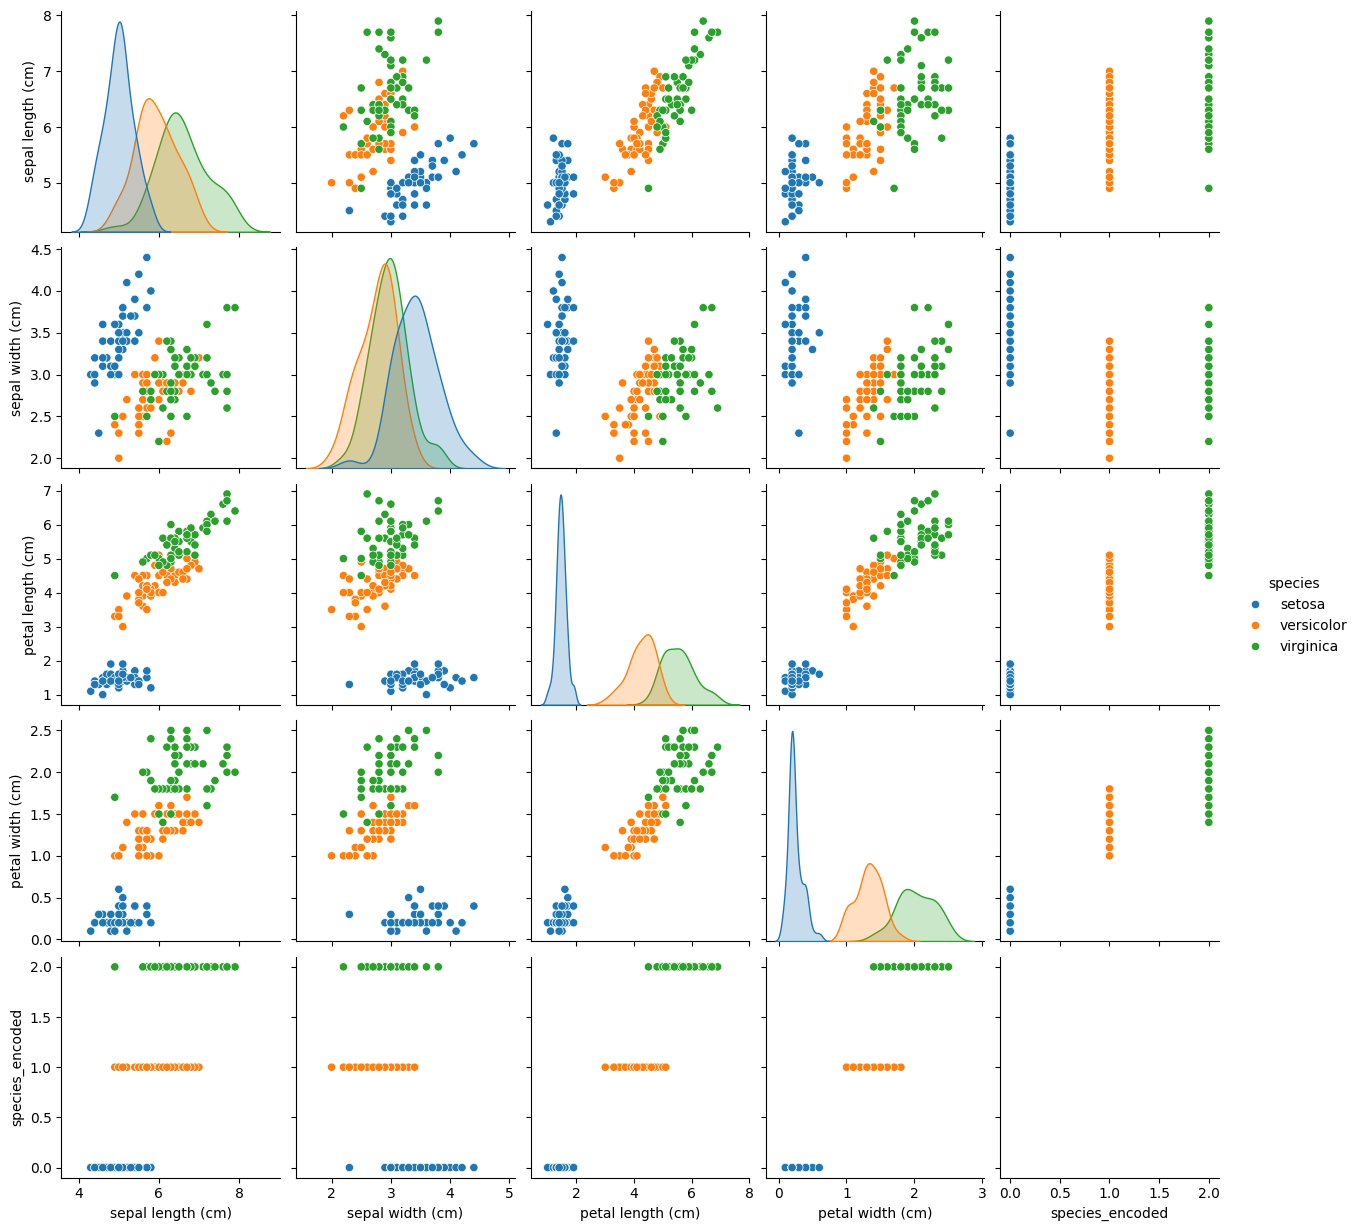


=== Model Evaluation Results ===

Logistic Regression Accuracy: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------------------------
Decision Tree Accuracy: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------------------------
Random Fore

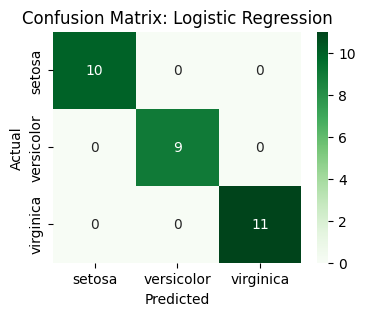

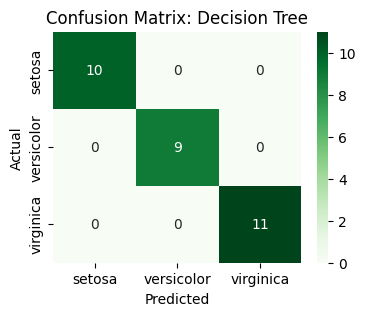

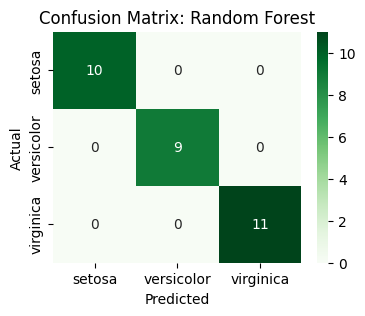


=== Models Trained and Evaluated ✅ ===
You can now input new flower measurements to predict its species.

Choose a model for prediction:
1 - Logistic Regression
2 - Decision Tree
3 - Random Forest


Enter 1, 2, or 3:  2



Enter values for the following features:


Sepal Length (cm):  25
Sepal Width (cm):  30
Petal Length (cm):  22
Petal Width (cm):  23



✅ Predicted Iris Species: virginica


In [2]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Load Dataset
df = pd.read_csv("C:/Users/aksha/Downloads/iris_dataset_group10.csv")

print("First 5 rows of dataset:")
print(df.head())

print("Dataset Shape:", df.shape)

# ✅ 3. Data Wrangling
print("\nChecking for missing values:")
print(df.isnull().sum())

# Encode species column
encoder = LabelEncoder()
df['species_encoded'] = encoder.fit_transform(df['species'])

print("\nUnique Encoded Classes:", encoder.classes_)

# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop(columns="species").corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

# 5. Train-Test Split
X = df.drop(["species", "species_encoded"], axis=1)
y = df["species_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  6. Train Models
# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#  7. Evaluation
models = {
    "Logistic Regression": log_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model
}

predictions = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf
}

print("\n=== Model Evaluation Results ===\n")
for model_name in models:
    acc = accuracy_score(y_test, predictions[model_name])
    print(f"{model_name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, predictions[model_name], target_names=encoder.classes_))
    print("-" * 60)

# 8. Confusion Matrix Visualization
for model_name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
                xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

#  9. Interactive Prediction Function
def predict_iris_species(model, encoder):
    print("\nEnter values for the following features:")
    try:
        sepal_length = float(input("Sepal Length (cm): "))
        sepal_width  = float(input("Sepal Width (cm): "))
        petal_length = float(input("Petal Length (cm): "))
        petal_width  = float(input("Petal Width (cm): "))
    except ValueError:
        print("Please enter valid numeric values.")
        return

    # Ensure column names match training data
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=X.columns)
    
    # Predict
    pred_encoded = model.predict(input_data)[0]
    pred_species = encoder.inverse_transform([pred_encoded])[0]

    print(f"\n Predicted Iris Species: {pred_species}")

#  10. Automatic Prompt After Training
if __name__ == "__main__":
    print("\n=== Models Trained and Evaluated  ===")
    print("You can now input new flower measurements to predict its species.")
    
    # Optionally let the user choose which model to use
    print("\nChoose a model for prediction:")
    print("1 - Logistic Regression")
    print("2 - Decision Tree")
    print("3 - Random Forest")
    
    model_choice = input("Enter 1, 2, or 3: ").strip()
    
    if model_choice == "1":
        chosen_model = log_model
    elif model_choice == "2":
        chosen_model = tree_model
    elif model_choice == "3":
        chosen_model = rf_model
    else:
        print("Invalid choice. Using Decision Tree by default.")
        chosen_model = tree_model
    
    # Call the interactive prediction function automatically
    predict_iris_species(chosen_model, encoder)
